<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>Team_17_A2_Analysis</h2>
<h4>DAT-5303 | Machine Learning</h4>
Mami-Zebah Anthony, Sian Yang Tan, Daniel Puello, Gaetano Caramico  <br>
Hult International Business School<br><br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

# Case Introduction:
**Windows or Mac?** <br>

We have been tasked by Apple to perform a research as to try to understand the consumer buying behavior that lies behind deciding which computer brand to buy. For this purpose, we have approached the question from the perspective of the Big Five personality traits as well as the Hult DNA. A survey was created with of question the combines personality traits from both perspectives and was applied to a sample of hult Students. We have used the results from said survey to run analysis, and form insights that will help apple improve their marketing tactics. 

# Analysis and Insights:

Our sample size was that of 137 students our of which 57% are Male and 43% are Female. In terms of region of origin, 43% are Asian, 18% are European, 17% are South American, 11% North American, 7% African, and 4% choose not to disclose their origin. Most importantly the sample is evenly distributed (50%-50%) between MacBook and Windows owners. 

We developed 5 main personas that represented principal components that helped explain more the 80% of the variance from the Dataset. Based on these personas we further clustered the information into 6 groups from which we discovered the following insights:

From our analysis, we can see that cluster 6 who are perfectionists and nerds, who are also predominantly Asian males prefer to own a MacBook when next they want to get a laptop assuming cost was the same. According to our analysis, both perfectionists and nerds have high levels of Conscientiousness, meaning they are persistent, resourceful, and goal-oriented. For these Asian males we can create an online competition (e.g., putting a difficult puzzle together) in which they pay a small token to play and if they win, they get 10% discount of a new MacBook of their choice.

It can also be noticed that Bullies in cluster 5 who are predominantly Asian women prefer to get a MacBook when next they want to make a Laptop purchase. Since these individuals are also strong-minded people and tend to be perseverant, yet impulsive and easily triggered, all we need to do is to keep marketing MacBook to them and probably add that they could get a voucher to get another apple product if they buy within a certain period.

The approachable loners have a high variance of North American men and Asian women in cluster 5 and 4 respectively who will opt to buy a MacBook when next they needed to get a new laptop. Since these individuals are more into themselves and like to make decisions on their own, we can send a short survey to them asking what they specifically want in a laptop and then target marketing adverts of our range of MacBook that meet those needs.

It is quite noticeable that cluster 3 to whom tend to be more sensitive, dramatic and concern about all detail functions the computer is equipped with and are willing to purchase a MacBook, we can encourage them by creating an avenue where they can design how their laptop design should be done and then give them a discount since their design will become our right and can be sold to other individuals.


In [1]:
########################################
# importing packages
########################################
import numpy             as np                   # mathematical essentials
import pandas            as pd                   # data science essentials
import matplotlib.pyplot as plt                  # fundamental data visualization
import seaborn           as sns                  # enhanced visualization
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.decomposition import PCA            # pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster import KMeans              # k-means clustering


########################################
# loading data and setting display options
########################################
# loading data
survey = pd.read_excel('./datasets/survey_data.xlsx')

# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

In [2]:
# Dividing the nationality from 5 major region
Africa =['Nigerian','Kenyan','Congolese (DR CONGO)','nigerian','Nigeria',\
         'Ghanaian','Mauritius','Belgian','Congolese','Ugandan']

Asia =['Indian','China','Russian','Chinese','Vietnamese','Turkish','Russia',\
       ' Thai','indian','Republic of Korea','Indonesian','Japan','china','South Korea','Philippines','Indonesia','indian.','INDIAN','Filipino','CHINA','chinese','Korea','Taiwan','Pakistani','Kyrgyz']

Europe = ['German','Norwegian','Italian','Czech','italian','Venezuelan',\
          'Ukrainian','Italian and Spanish','Dominican','British','Swiss','British, Indian','Spain','Belarus','Dominican','Czech Republic','Germany']               

North_America =['Mexican', 'American','USA','German/American','canadian',\
                'Canada','mexican']          

South_America =['Peruvian','Brazilian','Colombian','Brazil','colombian',\
                'Portuguese','Spanish','Peru','Ecuador','Ecuadorian','Costarrican','ecuador','Colombia','Panama']


for index, value in survey.iterrows():
    
    if survey.loc[index,"What is your nationality? "] in Africa:
        survey.loc[index,'Region'] = 'African'
        
    elif survey.loc[index,"What is your nationality? "] in Asia:
        survey.loc[index,'Region'] = 'Asian'
        
    elif survey.loc[index,"What is your nationality? "] in Europe:
        survey.loc[index,'Region'] = 'European'
        
    elif survey.loc[index,"What is your nationality? "] in North_America:
        survey.loc[index,'Region'] = 'North_American'
        
    elif survey.loc[index,"What is your nationality? "] in South_America:
        survey.loc[index,'Region'] = 'South_American'

    else:
        survey.loc[index,'Region'] = 'unknown'

In [3]:
# Taking the average of the duplicated columns
survey['Respond effectively to multiple priorities']\
= ( survey['Respond effectively to multiple priorities']\
+  survey['Respond effectively to multiple priorities.1'])/2

# Taking the average of the duplicated columns
survey["Take initiative even when circumstances, objectives, or rules aren't clear"]\
= ( survey["Take initiative even when circumstances, objectives, or rules aren't clear"]\
+  survey["Take initiative even when circumstances, objectives, or rules aren't clear.1"])/2

# Taking the average of the duplicated columns
survey["Encourage direct and open discussions"]\
= ( survey["Encourage direct and open discussions"]\
+  survey["Encourage direct and open discussions.1"])/2

In [4]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 80 columns):
surveyID                                                                        137 non-null int64
Am the life of the party                                                        137 non-null int64
Feel little concern for others                                                  137 non-null int64
Am always prepared                                                              137 non-null int64
Get stressed out easily                                                         137 non-null int64
Have a rich vocabulary                                                          137 non-null int64
Don't talk a lot                                                                137 non-null int64
Am interested in people                                                         137 non-null int64
Leave my belongings around                                                      137 non-null int64
Am r

In [5]:
# Creating new variables for big 5 traits: 
survey['Agreeableness'] = survey.iloc[:,[2, 7, 12, 17, 22, 27, 32, 37, 42, 47]].mean(axis=1)
survey['Conscientousness'] = survey.iloc[:,[3, 8, 13, 18, 23, 28, 33, 38, 43, 48]].mean(axis=1)
survey['Extraversion'] = survey.iloc[:,[1, 6, 11, 16, 21, 26, 31, 36, 41, 46]].mean(axis=1)
survey['Neuroticism'] = survey.iloc[:,[4, 9, 14, 19, 24, 29, 34, 39, 44, 49]].mean(axis=1)
survey['Openness'] = survey.iloc[:,[5, 10, 15, 20, 25, 30, 35, 40, 45, 50]].mean(axis=1)
survey['Team building'] = survey.iloc[:,[66, 67, 68, 69, 70, 71]].mean(axis=1)
survey['Thinking'] = survey.iloc[:,[51, 52, 53, 54, 55, 56]].mean(axis=1)
survey['Communicating'] = survey.iloc[:,[57,61, 62, 63, 64, 65]].mean(axis=1)

In [6]:
# Dropping original variables: 
survey = survey.drop(survey.columns[1:72], axis = 1)


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>User-Defined Functions</strong><br>
The following code loads the user-defined functions used throughout this Notebook.

In [7]:
########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(12, 12))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./analysis_images/Hult_Student_Survey_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()

In [8]:
########################################
# inertia
########################################
def interia_plot(data, max_clust = 50):
    """
PARAMETERS
----------
data      : DataFrame, data from which to build clusters. Dataset should be scaled
max_clust : int, maximum of range for how many clusters to check interia, default 50
    """

    ks = range(1, max_clust)
    inertias = []


    for k in ks:
        # INSTANTIATING a kmeans object
        model = KMeans(n_clusters = k)


        # FITTING to the data
        model.fit(data)


        # append each inertia to the list of inertias
        inertias.append(model.inertia_)



    # plotting ks vs inertias
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(ks, inertias, '-o')


    # labeling and displaying the plot
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()


########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>Checking information about non-missing values and data types for each column.</h4>

In [9]:
# checking information about each column
survey.isnull().sum(axis = 0)


surveyID                                                                    0
What laptop do you currently have?                                          0
What laptop would you buy in next assuming if all laptops cost the same?    0
What program are you in?                                                    0
What is your age?                                                           0
Gender                                                                      0
What is your nationality?                                                   0
What is your ethnicity?                                                     0
Region                                                                      0
Agreeableness                                                               0
Conscientousness                                                            0
Extraversion                                                                0
Neuroticism                                                     

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>Creating a summary of descriptive statistics for each column, rounded to two decimal places.</h4>

In [10]:
# summary of decriptive statistics

survey.describe(include='number').round(decimals=2)


,surveyID,What is your age?,Agreeableness,Conscientousness,Extraversion,Neuroticism,Openness,Team building,Thinking,Communicating
count,137.00,137.00,137.00,137.00,137.00,137.0,137.00,137.00,137.00,137.00
mean,10068.00,27.23,3.23,3.18,3.13,2.8,3.23,3.75,3.76,3.86
std,39.69,5.12,0.33,0.39,0.35,0.6,0.34,0.48,0.48,0.46
min,10000.00,21.00,2.50,2.40,2.20,1.4,2.50,2.50,2.17,2.58
25%,10034.00,24.00,3.00,2.90,2.90,2.3,3.00,3.50,3.50,3.58
50%,10068.00,26.00,3.20,3.20,3.10,2.7,3.20,3.67,3.83,3.83
75%,10102.00,29.00,3.40,3.40,3.40,3.3,3.50,4.00,4.00,4.17
max,10136.00,49.00,4.20,4.30,4.30,4.5,4.20,5.00,5.00,5.00


In [11]:
# scaling (normalizing) variables before correlation analysis

# dropping non numbers
survey_behavior = survey.select_dtypes(['number'])
survey_behavior = survey_behavior.drop(['surveyID'],axis=1)
survey_behavior = survey_behavior.drop(['What is your age?'],axis=1)

# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(survey_behavior)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(survey_behavior)


# converting scaled data into a DataFrame
survey_scaled = pd.DataFrame(X_scaled)


# reattaching column names
survey_scaled.columns = survey_behavior.columns


# checking pre- and post-scaling variance
print(pd.np.var(survey_behavior), '\n\n')
print(pd.np.var(survey_scaled))

Agreeableness       0.109425
Conscientousness    0.150881
Extraversion        0.124695
Neuroticism         0.359981
Openness            0.112109
Team building       0.230383
Thinking            0.227112
Communicating       0.212845
dtype: float64 


Agreeableness       1.0
Conscientousness    1.0
Extraversion        1.0
Neuroticism         1.0
Openness            1.0
Team building       1.0
Thinking            1.0
Communicating       1.0
dtype: float64


In [12]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
          random_state = 802)


# FITTING and TRANSFORMING the scaled data
survey_pca = pca.fit_transform(X_scaled)


# comparing dimensions of each DataFrame
print("Original shape:", X_scaled.shape)
print("PCA shape     :", survey_pca.shape)

Original shape: (137, 8)
PCA shape     : (137, 8)


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
As can be observed from above, the shape of the data did not change. However, the original DataFrame contains features, whereas the new DataFrame contains principal components. Before analyzing the factor loadings of each principal component, we have checked each component's explained variance ratio. Also note that the sum of all explained variance ratios sums to 1.0.

Looping over each principal component, printing its component number as well as its explained variance ratio.

In [13]:
# component number counter
component_number = 0


# looping over each principal component
for variance in pca.explained_variance_ratio_:
    component_number += 1
    print(f"PC {component_number} : {variance.round(3)}")

PC 1 : 0.35
PC 2 : 0.178
PC 3 : 0.115
PC 4 : 0.103
PC 5 : 0.091
PC 6 : 0.067
PC 7 : 0.052
PC 8 : 0.044


In [14]:
# printing the sum of all explained variance ratios

print(pca.explained_variance_ratio_.sum())

1.0


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>Scree Plots</strong><br>
One useful tool to visualize the explained variance of each principal component is the scree plot. Our goal in analyzing this plot is to look for a point where there is a drop in the marginal return of explained variance. In other words, we are looking for an "elbow" in the plot, where the line connecting each principal component becomes less steep.

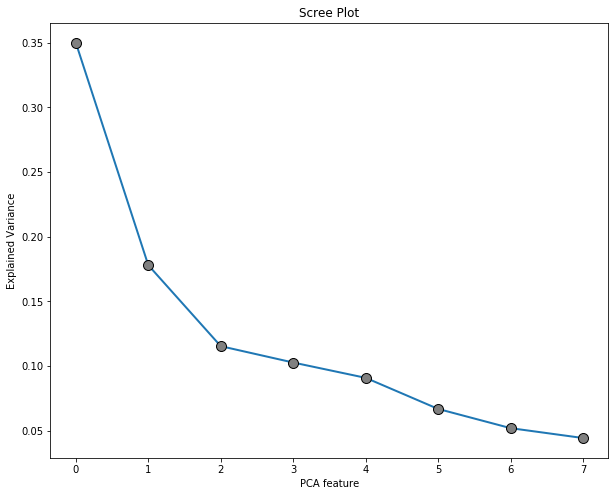

In [15]:
# calling the scree_plot function

scree_plot(pca_object = pca)

In [16]:
#Reducing the number of principal components based on the scree plot above, and also in order to retain enough PCs so that the cumulative explained variance ratio is greater than of equal to 0.80.
# INSTANTIATING a PCA object 
pca_5 = PCA(n_components=5,
          random_state = 219)


# FITTING and TRANSFORMING the scaled data
survey_pca_5 = pca_5.fit_transform(survey_scaled)




<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

Each observation in the dataset is a student from HULT. Therefore, each principal component can be thought of as a <a href="https://www.lexico.com/en/definition/persona">persona</a> to aid in interpretation. In our case we named the personas based on the traits within the BIG FIVE and Hult DNA.<br>

Analyzing factor loadings and developing personas for each principal component. Then, renaming the columns of the table with our persona names.

In [17]:
# transposing pca components
factor_loadings_df = pd.DataFrame(pd.np.transpose(pca_5.components_))


# naming rows as original features
factor_loadings_df = factor_loadings_df.set_index(survey_scaled.columns)


# checking the result
print(factor_loadings_df)


# saving to Excel
#factor_loadings_df.to_excel('customer_factor_loadings.xlsx')

                         0         1         2         3         4
Agreeableness    -0.385096  0.204096 -0.023378  0.167016 -0.699667
Conscientousness -0.288387  0.386897 -0.445368 -0.030142  0.595160
Extraversion     -0.339945  0.388426 -0.387232  0.192977 -0.133047
Neuroticism      -0.082168  0.537561  0.414279 -0.682194 -0.054171
Openness         -0.304724  0.197288  0.643066  0.504162  0.227449
Team building    -0.417244 -0.307668  0.064420 -0.406241  0.101934
Thinking         -0.437319 -0.322924  0.188606  0.089071  0.227572
Communicating    -0.433617 -0.361865 -0.162076 -0.203527 -0.147319


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [18]:
# naming each principal component based on the traits from the Big Five and Hult DNA.
factor_loadings_df.columns = ['Bullies',
                              'Perfectionists',
                              'Approachable loners',
                              'Dramatic',
                              'Nerds'
                             ]         

# checking the result
factor_loadings_df

,Bullies,Perfectionists,Approachable loners,Dramatic,Nerds
Agreeableness,-0.385096,0.204096,-0.023378,0.167016,-0.699667
Conscientousness,-0.288387,0.386897,-0.445368,-0.030142,0.595160
Extraversion,-0.339945,0.388426,-0.387232,0.192977,-0.133047
Neuroticism,-0.082168,0.537561,0.414279,-0.682194,-0.054171
Openness,-0.304724,0.197288,0.643066,0.504162,0.227449
Team building,-0.417244,-0.307668,0.064420,-0.406241,0.101934
Thinking,-0.437319,-0.322924,0.188606,0.089071,0.227572
Communicating,-0.433617,-0.361865,-0.162076,-0.203527,-0.147319


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
Now that we have developed personas, we can analyze how much each customer fits into each group. The following code was used to view the personas and factor loadings for each customer, as to confirm that they do fit.

In [19]:
# analyzing factor strengths per customer
survey_pca_reduced = pca_5.transform(survey_scaled)

# converting into a DataFrame 
survey_pca = pd.DataFrame(survey_pca_reduced)


# renaming columns
survey_pca.columns = factor_loadings_df.columns


# checking results
survey_pca

,Bullies,Perfectionists,Approachable loners,Dramatic,Nerds
0,0.477602,-0.034541,-0.056304,0.024785,1.083974
1,-0.357243,0.648137,0.276707,-1.253534,0.201398
2,2.105876,0.623521,-0.799878,0.612764,-0.350493
3,-2.999789,0.271736,1.103490,-0.473134,-1.718639
4,0.214520,2.339314,0.192432,0.362688,-0.072356
5,1.826262,0.852489,0.480197,-1.200119,-0.743905
6,-0.324827,-0.464803,-0.022193,-2.163366,-0.769917
7,0.404469,-0.690675,-0.551074,0.619169,-0.324032
8,0.863890,-0.551086,-0.173918,-0.754642,0.240289
9,-0.529404,-1.291673,-0.572384,0.399539,0.357000


In [20]:
# checking variance amongst clusters
np.var(survey_pca)

Bullies                2.800363
Perfectionists         1.423929
Approachable loners    0.922897
Dramatic               0.821543
Nerds                  0.726821
dtype: float64

In [21]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(survey_pca)


# TRANSFORMING our data after fit
survey_scaled_pca = scaler.transform(survey_pca)


# converting scaled data into a DataFrame
pca_scaled = pd.DataFrame(survey_scaled_pca)


# reattaching column names with 5 features name
pca_scaled.columns = ['Bullies',
                      'Perfectionists',
                      'Approachable loners',
                      'Dramatic',
                       'Nerds'
                        ]         



# checking pre- and post-scaling variance
print(pd.np.var(survey_pca), '\n\n')
print(pd.np.var(pca_scaled))


Bullies                2.800363
Perfectionists         1.423929
Approachable loners    0.922897
Dramatic               0.821543
Nerds                  0.726821
dtype: float64 


Bullies                1.0
Perfectionists         1.0
Approachable loners    1.0
Dramatic               1.0
Nerds                  1.0
dtype: float64


Clustering

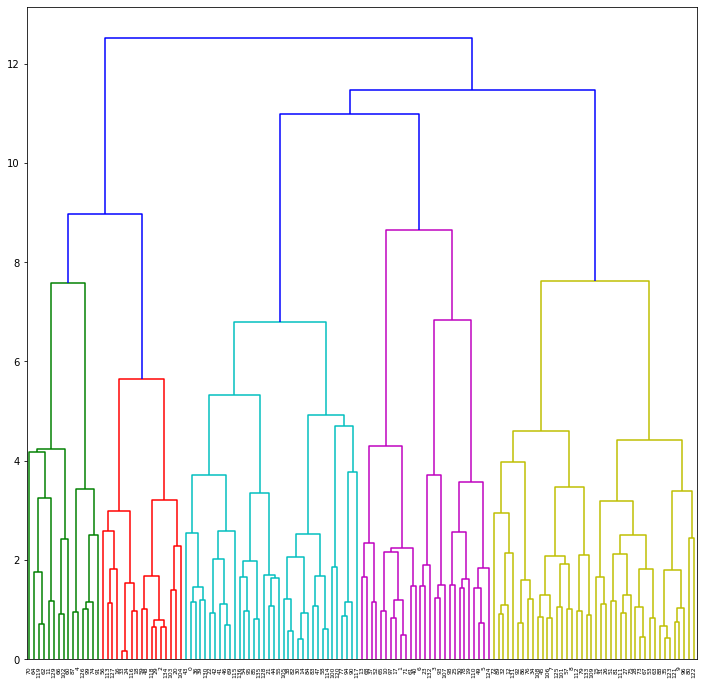

In [22]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_scaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# saving and displaying the plot
#plt.savefig('./analysis_images/standard_hierarchical_clust_ward.png')
plt.show()

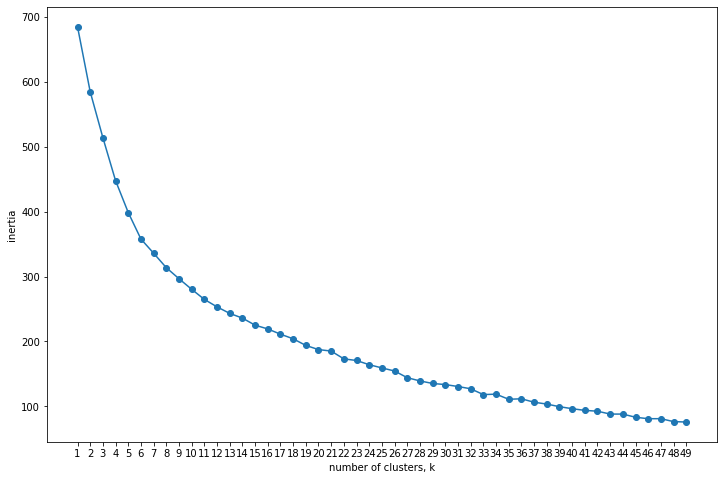

In [23]:
# calling the inertia_plot() function
interia_plot(pca_scaled) 

In [24]:
# INSTANTIATING a k-Means object with clusters
survey_k_pca = KMeans(n_clusters   = 6,
                         random_state = 219)


# fitting the object to the data
survey_k_pca.fit(pca_scaled)


# converting the clusters to a DataFrame
survey_kmeans_pca = pd.DataFrame({'Cluster': survey_k_pca.labels_})


# checking the results
print(survey_kmeans_pca.iloc[: , 0].value_counts())


2    31
0    26
1    23
5    19
4    19
3    19
Name: Cluster, dtype: int64


In [25]:
# storing cluster centers
centroids_pca = survey_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = ['Bullies',
                      'Perfectionists',
                      'Approachable loners',
                      'Dramatic',
                       'Nerds'
                        ] 

# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)


,Bullies,Perfectionists,Approachable loners,Dramatic,Nerds
0,0.18,-0.41,1.05,0.37,0.88
1,-0.72,-0.98,0.21,-0.56,-0.92
2,0.39,-0.33,-0.78,0.57,-0.29
3,0.05,0.20,-0.53,-1.28,0.80
4,1.21,1.01,0.32,-0.09,-0.67
5,-1.27,1.08,-0.20,0.62,0.26


In [26]:
# concatenating cluster memberships with principal components
clst_pca_df = pd.concat([survey_kmeans_pca,
                         survey_pca],
                         axis = 1)


# checking results
clst_pca_df


# concatenating demographic information with pca-clusters
final_pca_clust_df = pd.concat([survey.loc[ : , ['Gender','Region','What laptop do you currently have?',\
                                                 'What laptop would you buy in next assuming if all laptops cost the same?']],
                                clst_pca_df],
                                axis = 1)
#survey.rename(columns = {'What is your nationality? ': 'Country', 'What is your ethnicity?':'Ethnic'})

# renaming columns
final_pca_clust_df.columns = ['Gender','Region',
                              'What laptop do you currently have?',
                              'What laptop would you buy in next assuming if all laptops cost the same?',
                              'cluster',
                              'Bullies',
                      'Perfectionists',
                      'Approachable loners',
                      'Dramatic',
                       'Nerds'
                              ]


# checking the results
print(final_pca_clust_df.head(n = 5))

   Gender          Region What laptop do you currently have? What laptop would you buy in next assuming if all laptops cost the same?  cluster   Bullies  Perfectionists  Approachable loners  Dramatic     Nerds
0  Female  South_American                            Macbook                                                                  Macbook        0  0.477602       -0.034541            -0.056304  0.024785  1.083974
1    Male  South_American                     Windows laptop                                                           Windows laptop        3 -0.357243        0.648137             0.276707 -1.253534  0.201398
2    Male           Asian                     Windows laptop                                                           Windows laptop        2  2.105876        0.623521            -0.799878  0.612764 -0.350493
3  Female           Asian                     Windows laptop                                                           Windows laptop        1 -2.999789        

In [27]:
# renaming regions
cluster_names = {0 : 'Cluster 1',
                 1 : 'Cluster 2',
                 2 : 'Cluster 3',
                 3 : 'Cluster 4',
                 4 : 'Cluster 5',
                 5 : 'Cluster 6'}


final_pca_clust_df['cluster'].replace(cluster_names, inplace = True)



In [28]:
final_pca_clust_df.to_excel('./datasets/final_pca_clust_df.xlsx',
                           index = False)

In [29]:
survey.columns

Index(['surveyID', 'What laptop do you currently have?', 'What laptop would you buy in next assuming if all laptops cost the same?', 'What program are you in?', 'What is your age?', 'Gender', 'What is your nationality? ', 'What is your ethnicity?', 'Region', 'Agreeableness', 'Conscientousness', 'Extraversion', 'Neuroticism', 'Openness', 'Team building', 'Thinking', 'Communicating'], dtype='object')

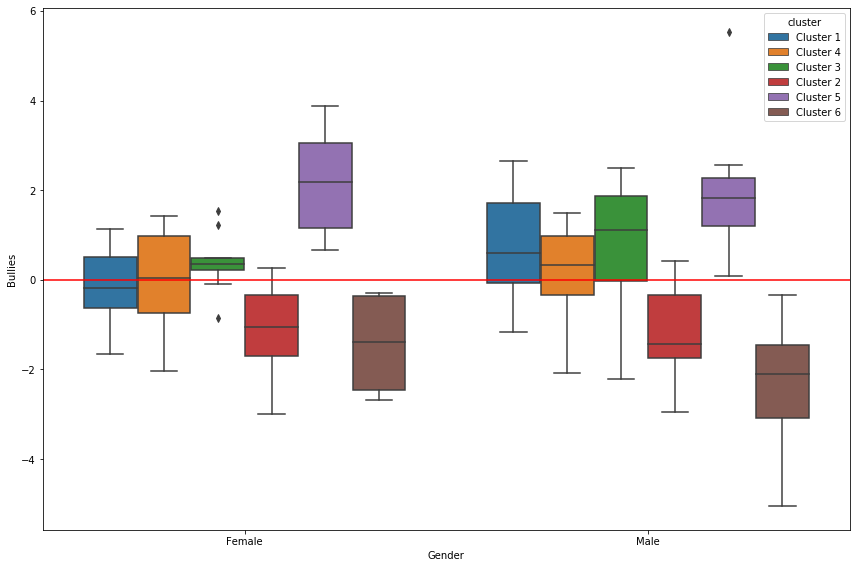

In [30]:
########################
# Bullies vs Gender
########################

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Gender',
            y = 'Bullies',
            hue = 'cluster',
            data = final_pca_clust_df)

plt.axhline(y = final_pca_clust_df['Bullies'].mean(),
                    color = 'red')

# formatting and displaying the plot
plt.tight_layout()
plt.show()

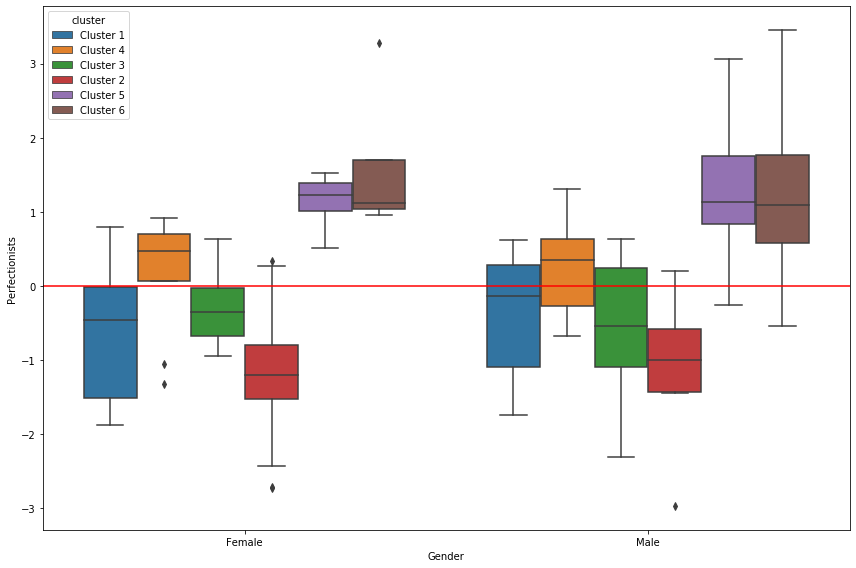

In [31]:
########################
# Perfectionists vs Gender
########################

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Gender',
            y = 'Perfectionists',
            hue = 'cluster',
            data = final_pca_clust_df)

plt.axhline(y = final_pca_clust_df['Perfectionists'].mean(),
                    color = 'red')

# formatting and displaying the plot
plt.tight_layout()
plt.show()

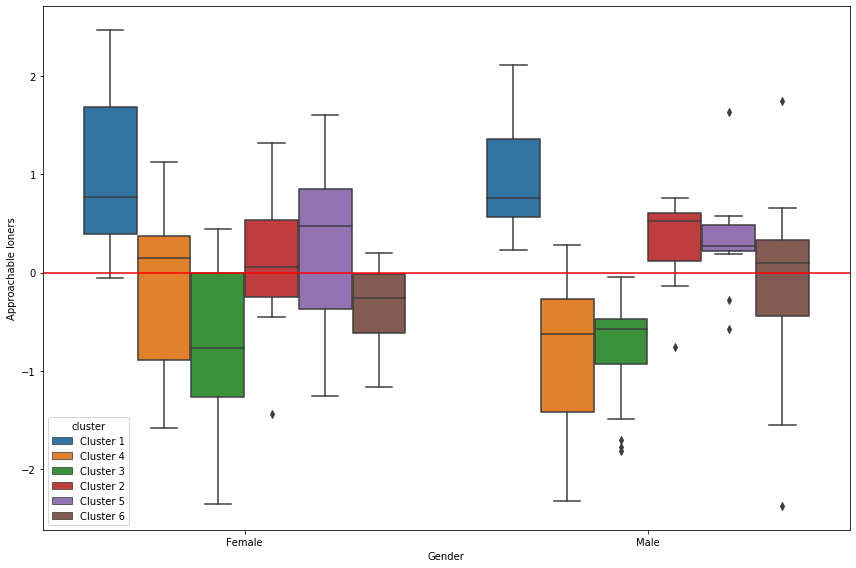

In [32]:
########################
# Approachable loners vs Gender
########################

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Gender',
            y = 'Approachable loners',
            hue = 'cluster',
            data = final_pca_clust_df)

plt.axhline(y = final_pca_clust_df['Approachable loners'].mean(),
                    color = 'red')


# formatting and displaying the plot
plt.tight_layout()
plt.show()

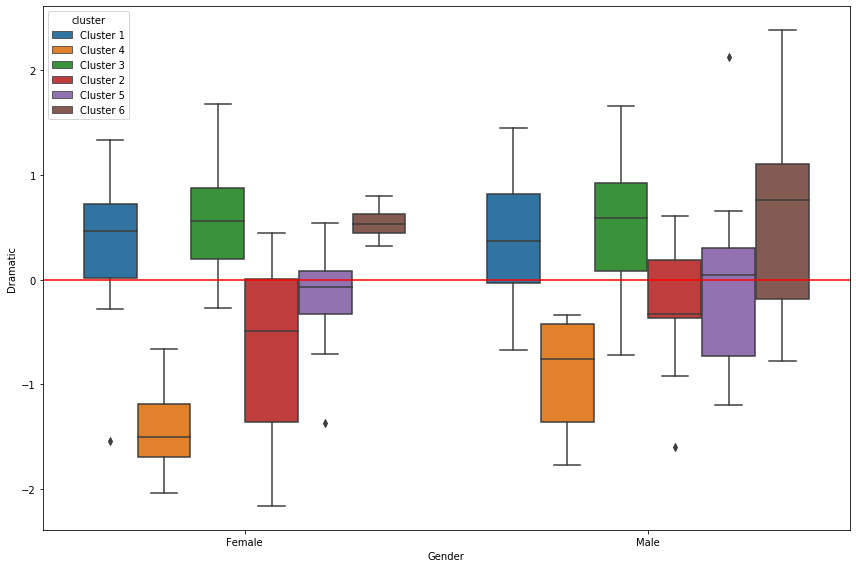

In [33]:
########################
# Dramatic vs Gender
########################

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Gender',
            y = 'Dramatic',
            hue = 'cluster',
            data = final_pca_clust_df)

plt.axhline(y = final_pca_clust_df['Dramatic'].mean(),
                    color = 'red')

# formatting and displaying the plot
plt.tight_layout()
plt.show()

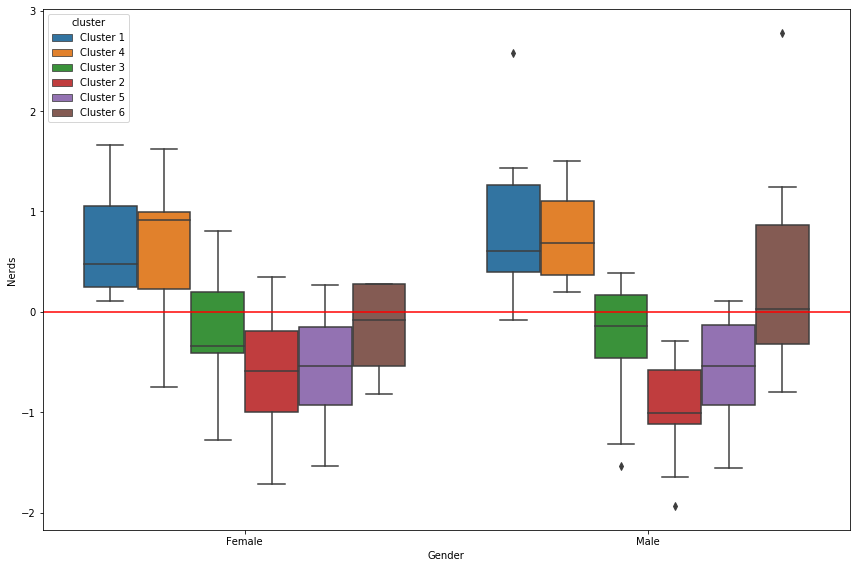

In [34]:
########################
# Nerds vs Gender
########################

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Gender',
            y = 'Nerds',
            hue = 'cluster',
            data = final_pca_clust_df)

plt.axhline(y = final_pca_clust_df['Nerds'].mean(),
                    color = 'red')


# formatting and displaying the plot
plt.tight_layout()
plt.show()

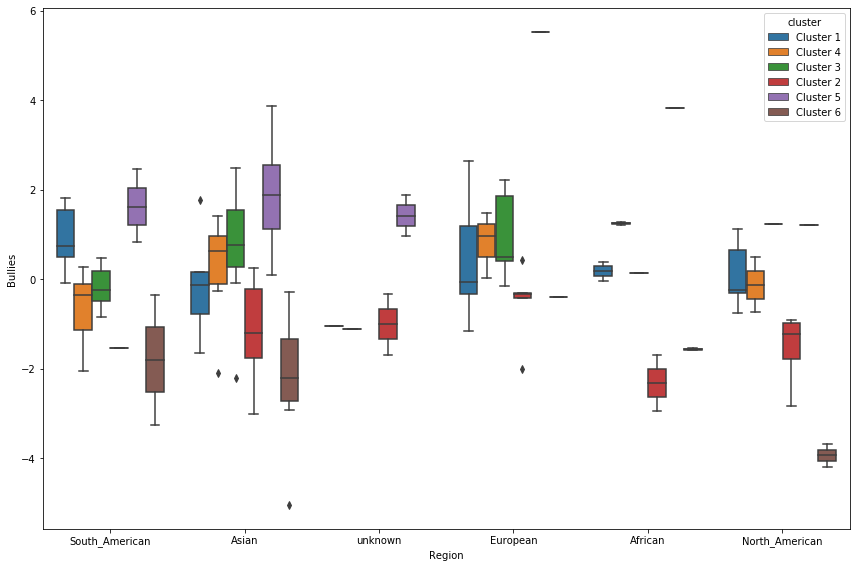

In [35]:
########################
# Bullies vs Region
########################

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Region',
            y = 'Bullies',
            hue = 'cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

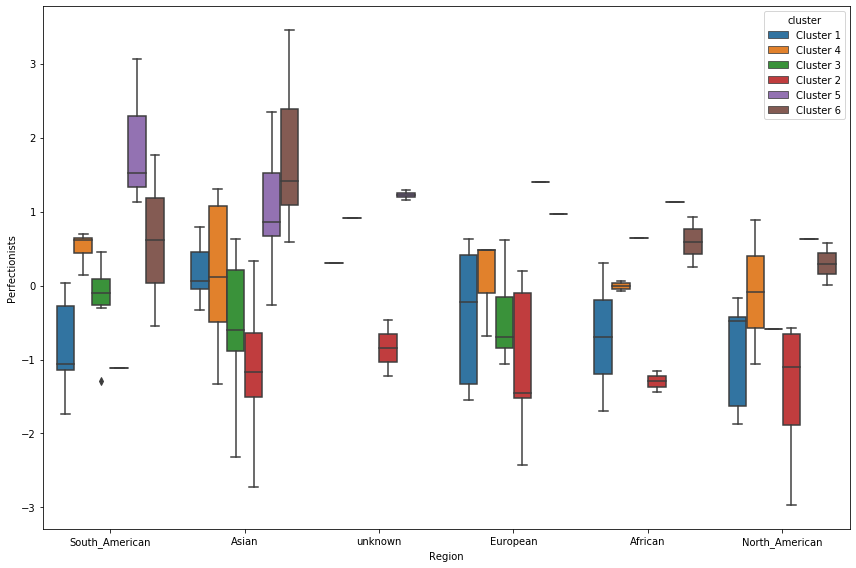

In [36]:
########################
# Perfectionists vs Region
########################

# Perfectionists
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Region',
            y = 'Perfectionists',
            hue = 'cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

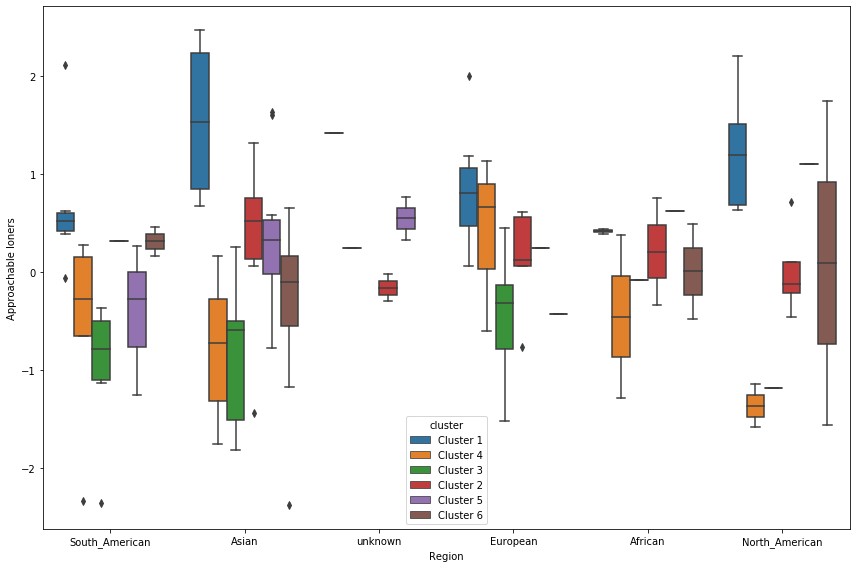

In [37]:
########################
# Approachable loners vs Region
########################

# Approachable loners
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Region',
            y = 'Approachable loners',
            hue = 'cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

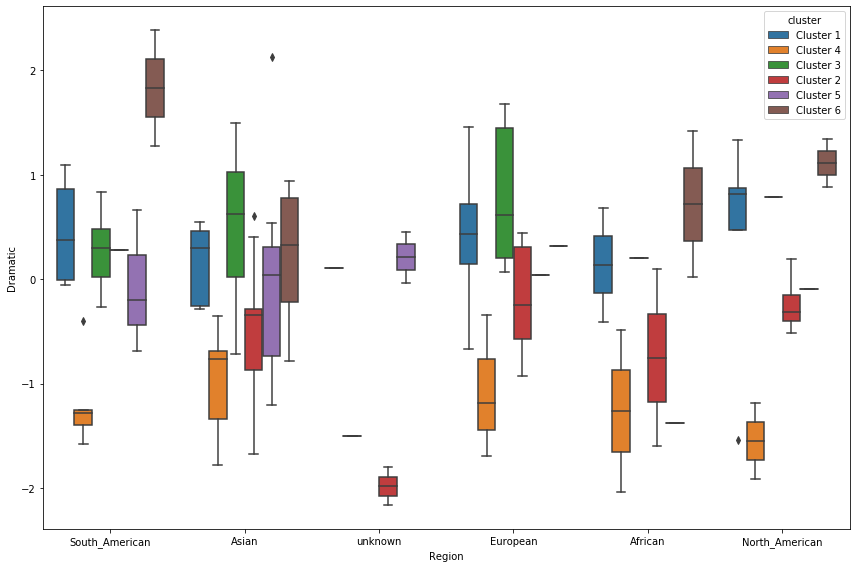

In [38]:
########################
# Dramatic vs Region
########################

# Dramatic
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Region',
            y = 'Dramatic',
            hue = 'cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

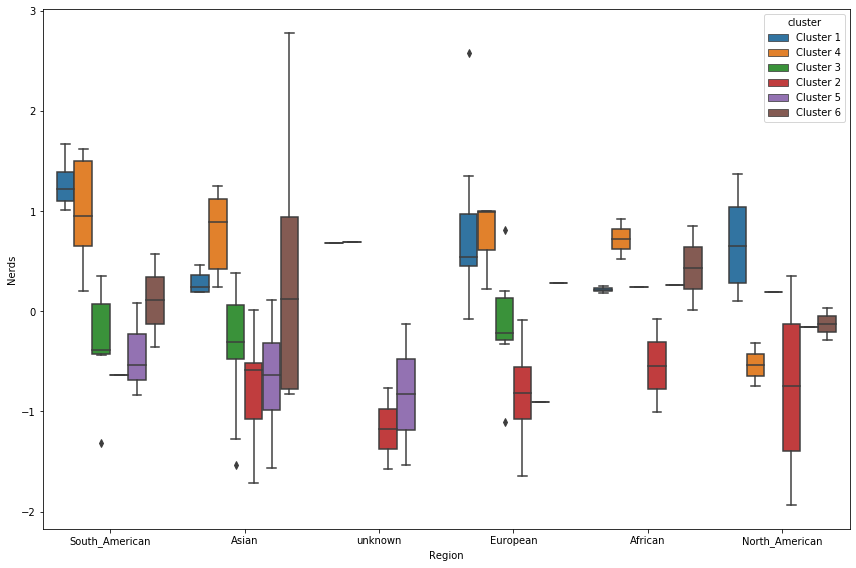

In [39]:
########################
# Nerds vs Region
########################

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Region',
            y = 'Nerds',
            hue = 'cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

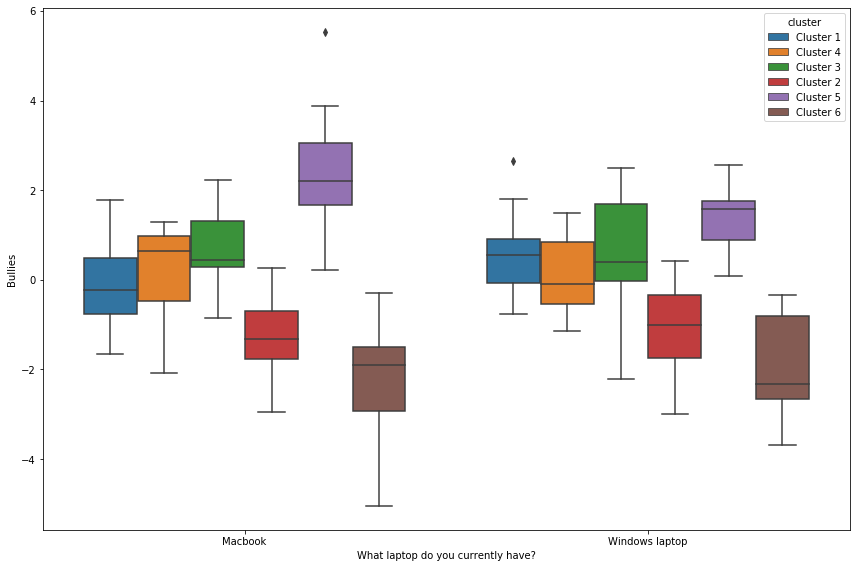

In [40]:
########################
# Bullies vs Laptop Type
########################

# Bullies
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop do you currently have?',
            y = 'Bullies',
            hue = 'cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

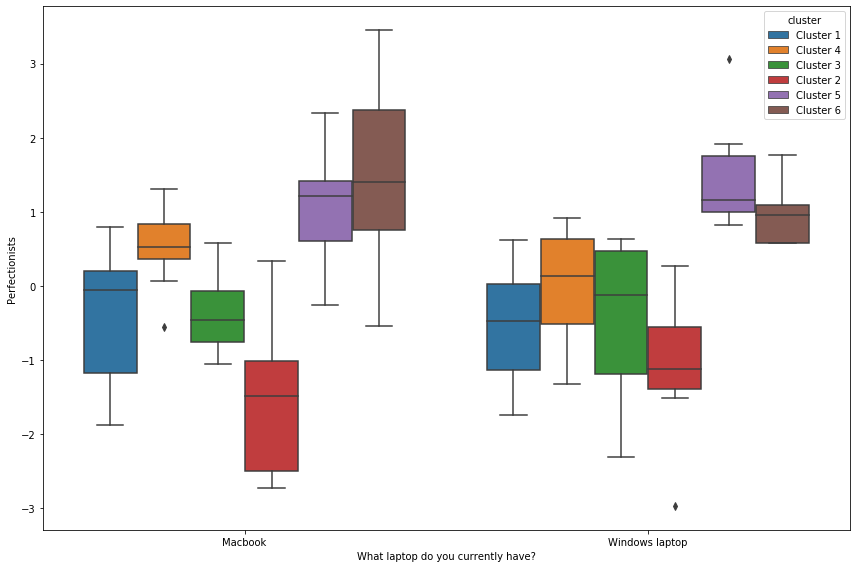

In [41]:
########################
# Perfectionists vs Laptop Type
########################

# Perfectionists
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop do you currently have?',
            y = 'Perfectionists',
            hue = 'cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

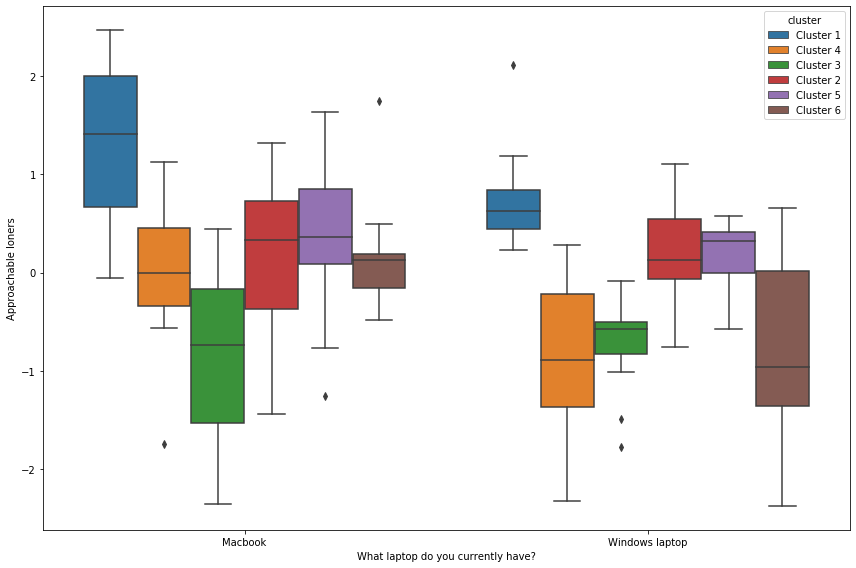

In [42]:
########################
# Approachable loners vs Laptop Type
########################

# Approachable loners
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop do you currently have?',
            y = 'Approachable loners',
            hue = 'cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

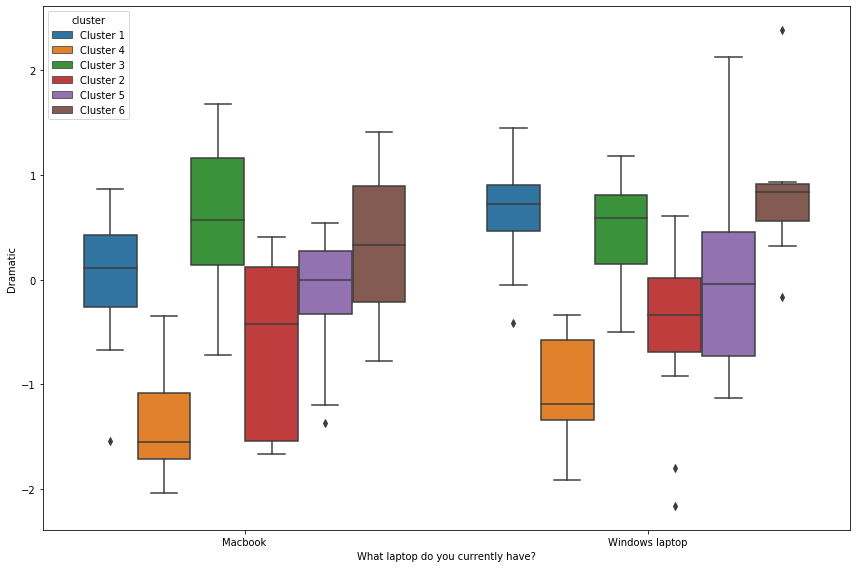

In [43]:
########################
# Dramatic vs Laptop Type
########################

# Dramatic loners
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop do you currently have?',
            y = 'Dramatic',
            hue = 'cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

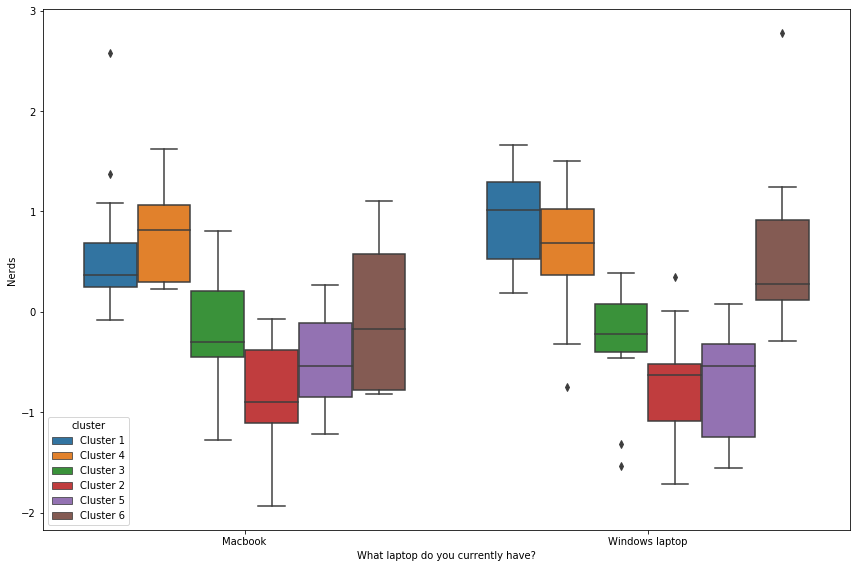

In [44]:
########################
# Nerds vs Laptop Type
########################

# Nerds loners
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop do you currently have?',
            y = 'Nerds',
            hue = 'cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

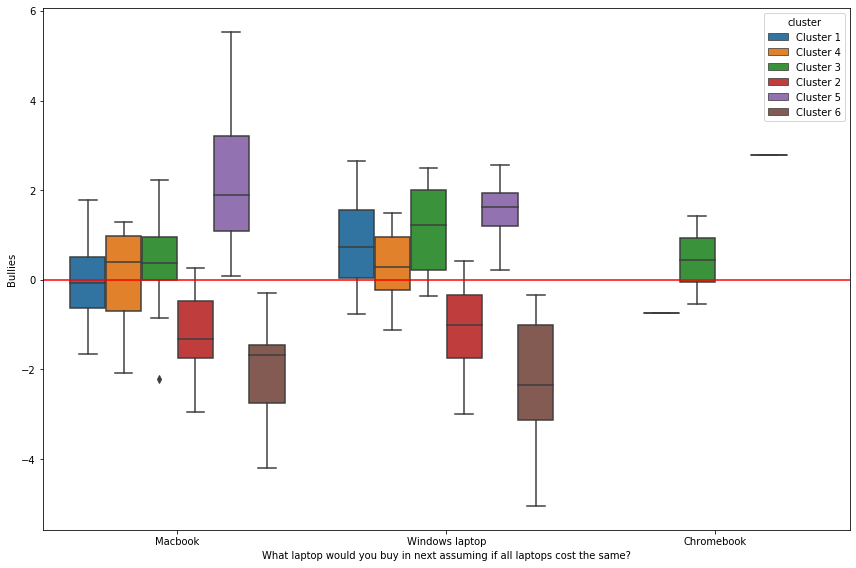

In [45]:
#####################################
# Bullies vs Laptop Type for  the future
#####################################

# Bullies
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Bullies',
            hue = 'cluster',
            data = final_pca_clust_df)

plt.axhline(y = final_pca_clust_df['Bullies'].mean(),
                    color = 'red')

# formatting and displaying the plot
plt.tight_layout()
plt.show()

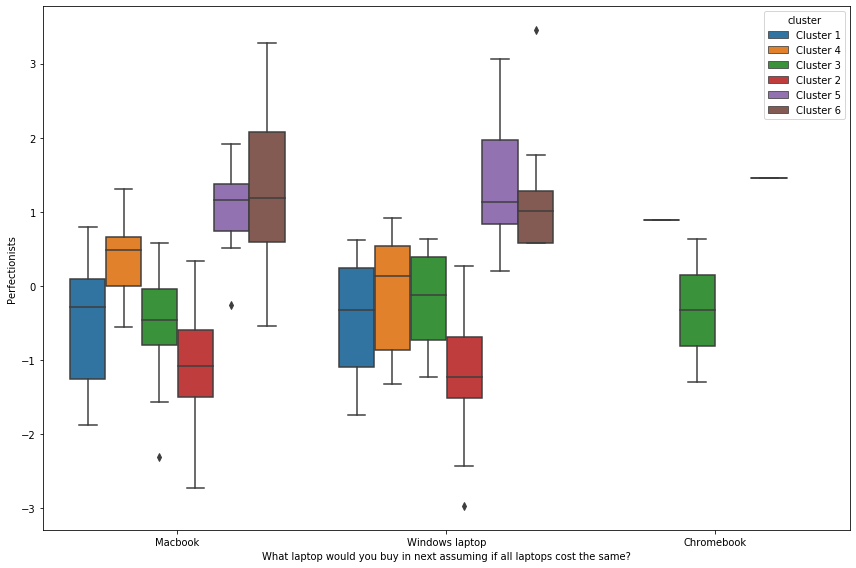

In [46]:
#####################################
# Perfectionists vs Laptop Type for  the future
#####################################

# Perfectionists
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Perfectionists',
            hue = 'cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

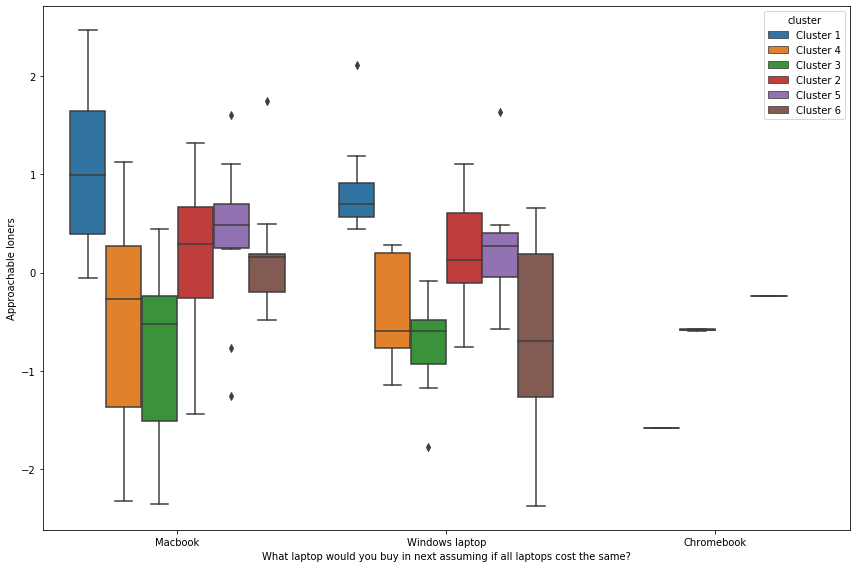

In [47]:
#####################################
# Approachable loners vs Laptop Type for  the future
#####################################

# Approachable loners
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Approachable loners',
            hue = 'cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

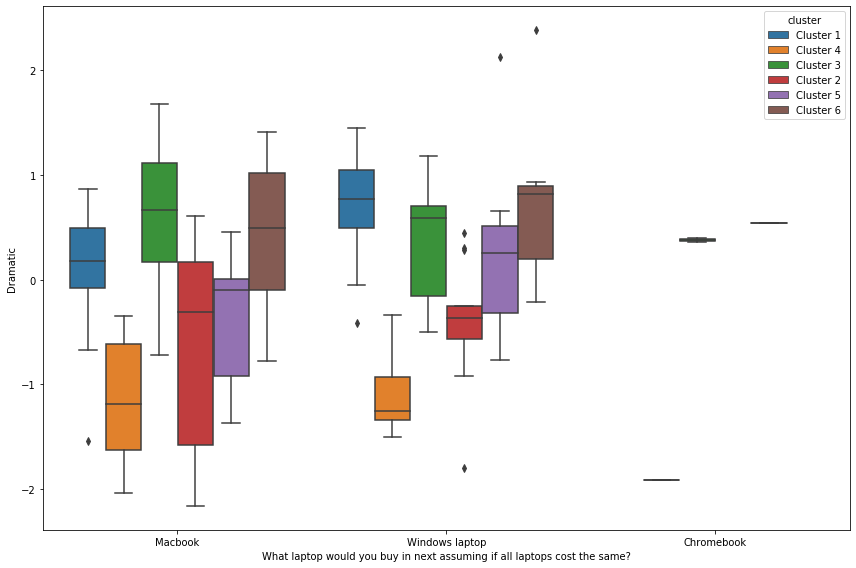

In [48]:
#####################################
# Dramatic vs Laptop Type for  the future
#####################################

# Dramatic
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Dramatic',
            hue = 'cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

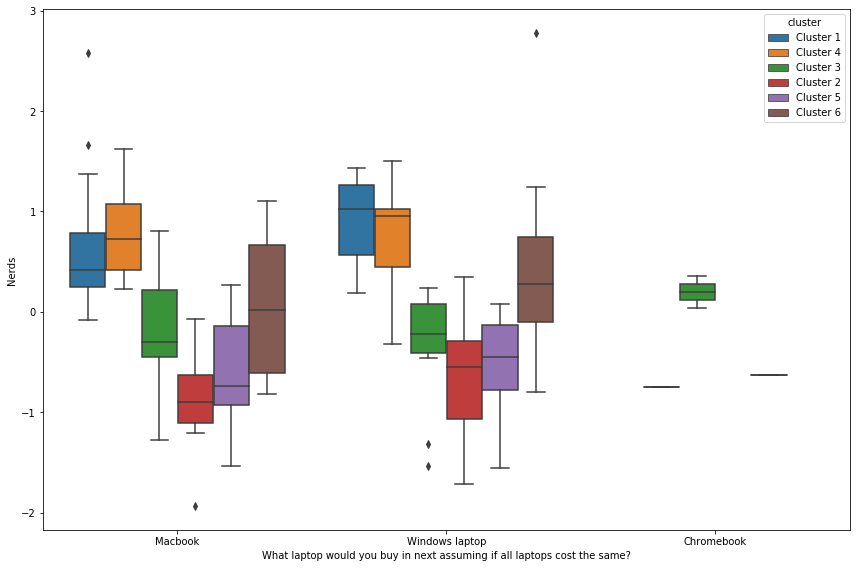

In [49]:
#####################################
# Nerds vs Laptop Type for  the future
#####################################

# Nerds
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Nerds',
            hue = 'cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

~~~


 ,--.-,,-,--,             .-._            _,---.                                        
/==/  /|=|  |.--.-. .-.-./==/ \  .-._ _.='.'-,  \  .-.,.---.  ,--.-.  .-,--.            
|==|_ ||=|, /==/ -|/=/  ||==|, \/ /, /==.'-     / /==/  `   \/==/- / /=/_ /             
|==| ,|/=| _|==| ,||=| -||==|-  \|  /==/ -   .-' |==|-, .=., \==\, \/=/. /              
|==|- `-' _ |==|- | =/  ||==| ,  | -|==|_   /_,-.|==|   '='  /\==\  \/ -/               
|==|  _     |==|,  \/ - ||==| -   _ |==|  , \_.' )==|- ,   .'  |==|  ,_/                
|==|   .-. ,\==|-   ,   /|==|  /\ , \==\-  ,    (|==|_  . ,'.  \==\-, /                 
/==/, //=/  /==/ , _  .' /==/, | |- |/==/ _  ,  //==/  /\ ,  ) /==/._/                  
`--`-' `-`--`--`..---'   `--`./  `--``--`------' `--`-`--`--'  `--`-`                   
     _,---.     _,.---._                                                                
  .-`.' ,  \  ,-.' , -  `.   .-.,.---.                                                  
 /==/_  _.-' /==/_,  ,  - \ /==/  `   \                                                 
/==/-  '..-.|==|   .=.     |==|-, .=., |                                                
|==|_ ,    /|==|_ : ;=:  - |==|   '='  /                                                
|==|   .--' |==| , '='     |==|- ,   .'                                                 
|==|-  |     \==\ -    ,_ /|==|_  . ,'.                                                 
/==/   \      '.='. -   .' /==/  /\ ,  )                                                
`--`---'        `--`--''   `--`-`--`--'                                                 
   ,-,--.                _,.----.    _,.----.       ,----.    ,-,--.    ,-,--.   .=-.-. 
 ,-.'-  _\ .--.-. .-.-..' .' -   \ .' .' -   \   ,-.--` , \ ,-.'-  _\ ,-.'-  _\ /==/_ / 
/==/_ ,_.'/==/ -|/=/  /==/  ,  ,-'/==/  ,  ,-'  |==|-  _.-`/==/_ ,_.'/==/_ ,_.'|==|, |  
\==\  \   |==| ,||=| -|==|-   |  .|==|-   |  .  |==|   `.-.\==\  \   \==\  \   |==|  |  
 \==\ -\  |==|- | =/  |==|_   `-' \==|_   `-' \/==/_ ,    / \==\ -\   \==\ -\  /==/. /  
 _\==\ ,\ |==|,  \/ - |==|   _  , |==|   _  , ||==|    .-'  _\==\ ,\  _\==\ ,\ `--`-`   
/==/\/ _ ||==|-   ,   |==\.       |==\.       /|==|_  ,`-._/==/\/ _ |/==/\/ _ | .=.     
\==\ - , //==/ , _  .' `-.`.___.-' `-.`.___.-' /==/ ,     /\==\ - , /\==\ - , /:=; :    
 `--`---' `--`..---'                           `--`-----``  `--`---'  `--`---'  `=`                                                                      



~~~

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />